In [1]:
"""Raquel García Bellés
Bachelor's degree in Mathematics
Universitat Autònoma de Barcelona
Final project - Beating the Nyquist-Shannon theorem with randomness: the magic of compressed sensing.
Last update: 15/03/2021

Notebook based on an example from:
S. L. Brunton and J. N. Kutz. Data-Driven Science and Engineering: 
Machine Learning, Dynamical Systems, and Control. Cambridge University Press, 2019.
"""

from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt

# importing the image called tobi.jpg
A=imread('tobi.jpg')

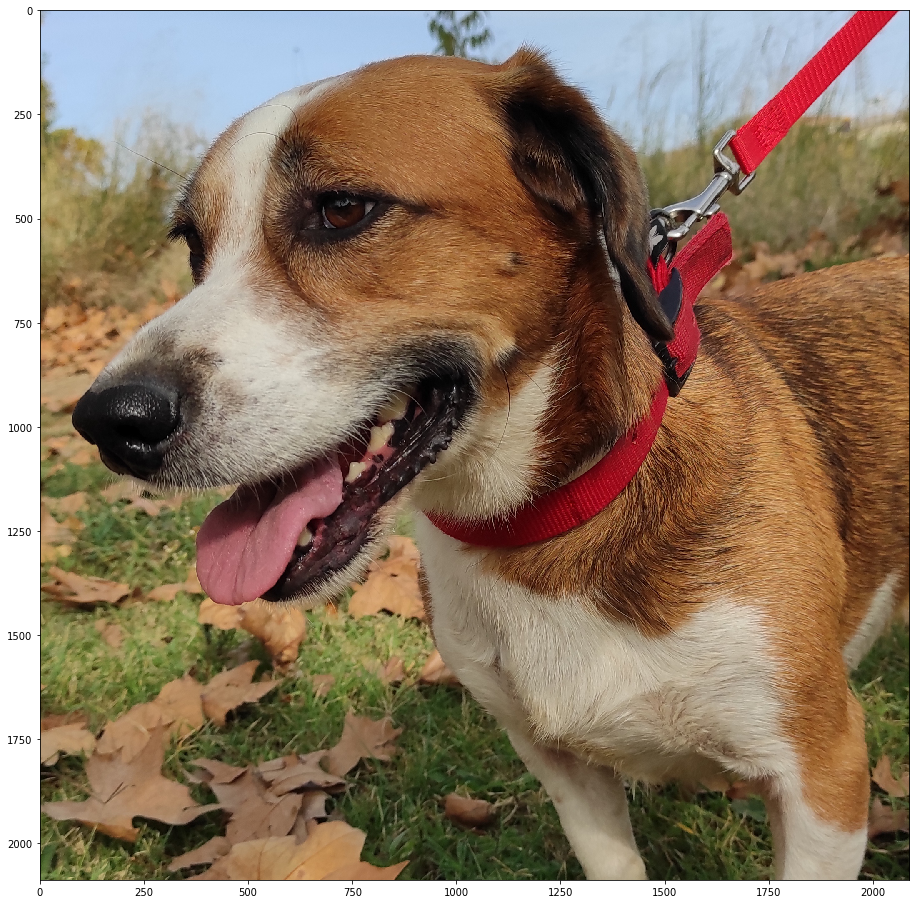

In [2]:
plt.figure(figsize = (16,16))
plt.imshow(A)

In [3]:
# In an RGB image each pixel contains three parameters wich indicate how much red, green and blue there is 
# to give the final color

np.shape(A) #2088x2088 RGB image

(2088, 2088, 3)

In [4]:
# To obtain a gray scale image we average the three color coefficients of each pixel
B=np.mean(A,-1)
print(np.shape(B))

(2088, 2088)


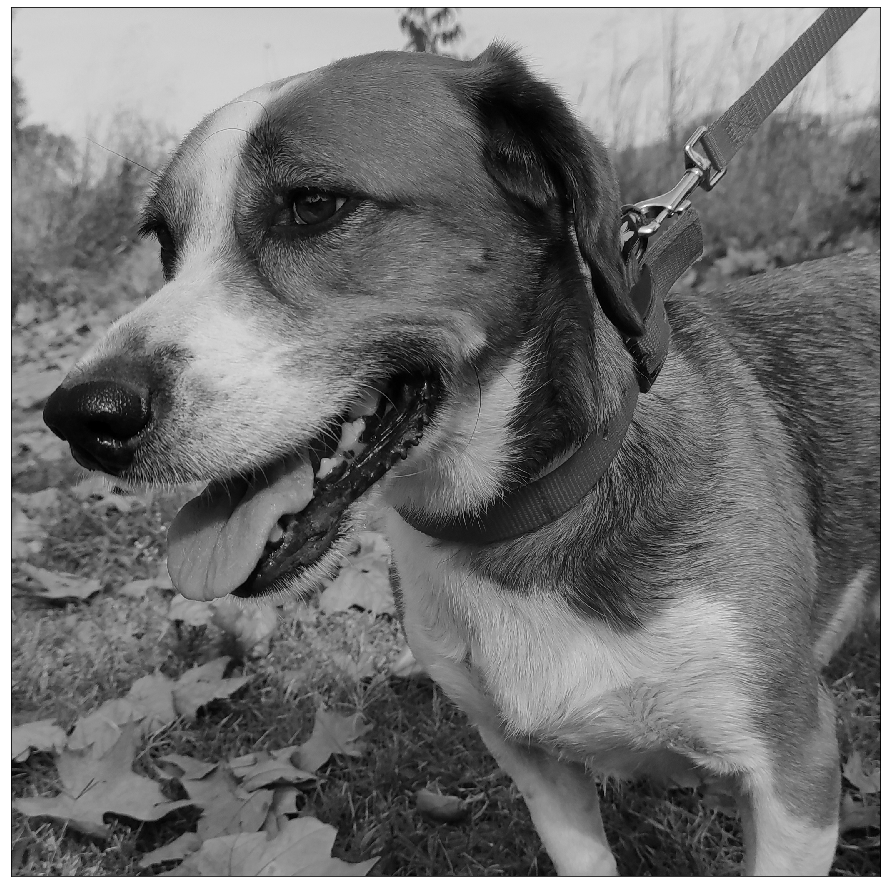

In [5]:
fig = plt.figure(figsize = (16,16))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(B, 'gray')
plt.savefig('tobigray.png',bbox_inches='tight')
plt.show()

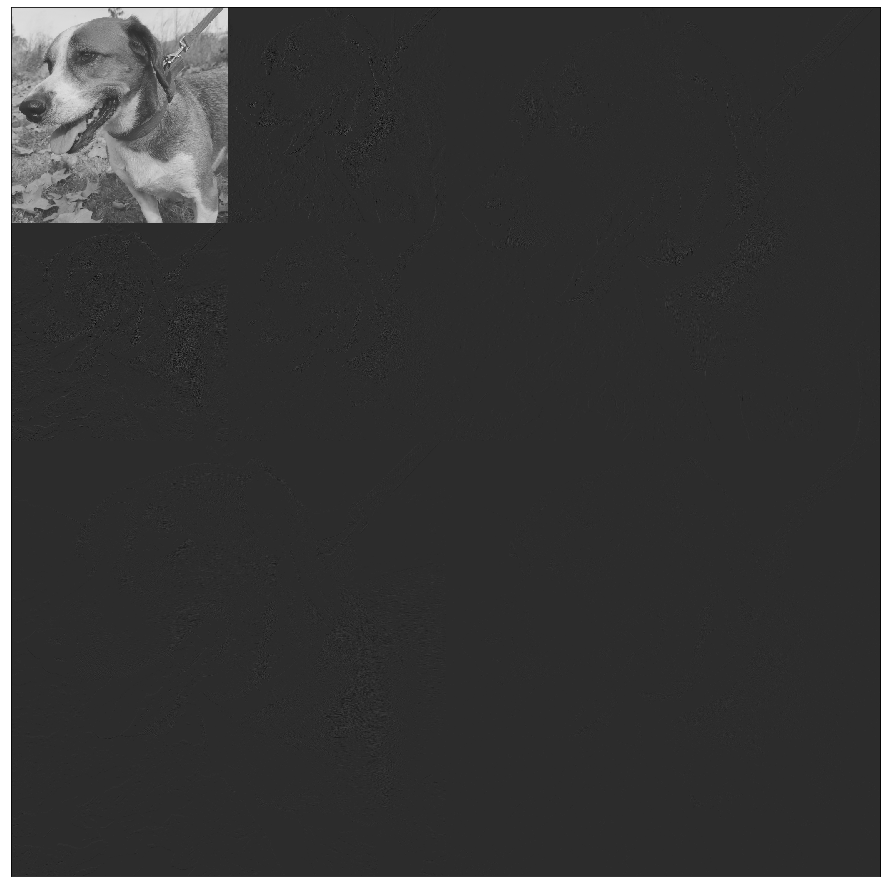

In [6]:
## Wavelet transform
n=2
w = 'db1' #Daubechies
coeffs = pywt.wavedec2(B, wavelet=w, level = n)

# normalize each coefficient array
#coeffs[0] /= np.abs(coeffs[0]).max()
#for detail_level in range(n):
#    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level+1]]
    
arr, coeff_slices = pywt.coeffs_to_array(coeffs)

fig = plt.figure(figsize = (16,16))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(arr, cmap = 'gray')#, vmin = -0.25, vmax = 0.75)
plt.savefig('tobiwavelet.png',bbox_inches='tight')
plt.show()

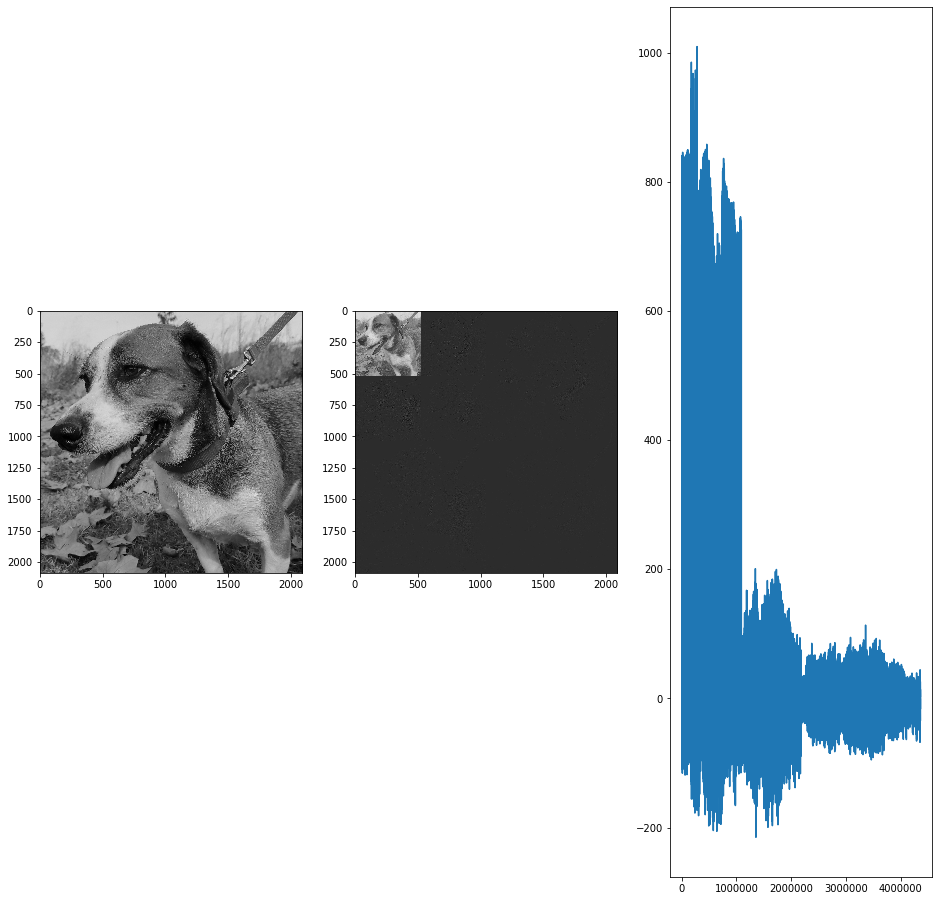

<Figure size 1296x1152 with 0 Axes>

In [8]:
arrflat = arr.flatten()
x= []
for i in range(0,len(arrflat)):
    x.append(i)
fig, axs = plt.subplots(1, 3, figsize=(16, 16))
axs[0].imshow(B,'gray')
axs[1].imshow(arr, cmap = 'gray')#, vmin = -0.25, vmax = 0.75)
axs[2].plot(x, arrflat)
plt.rcParams['figure.figsize'] = [16,16]
fig = plt.figure(figsize = (18,16))
plt.show()

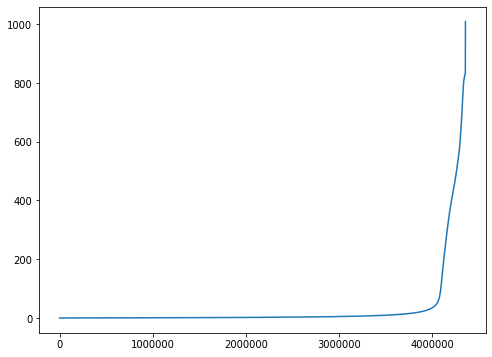

In [55]:
plt.figure(figsize = (8,6))
plt.plot(range(len(arrflat)),np.sort(abs(arrflat)))

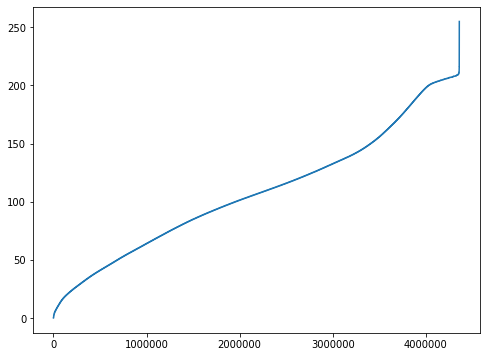

In [56]:
Bflat = B.flatten()
plt.figure(figsize = (8,6))
plt.plot(range(len(Bflat)),np.sort(Bflat))

In [57]:
sorted_arrflat = np.sort(abs(arrflat))
kbest_error = []
for k in range(1, len(arrflat)+1):
    kbest_error.append(np.linalg.norm(sorted_arrflat[:-k]))

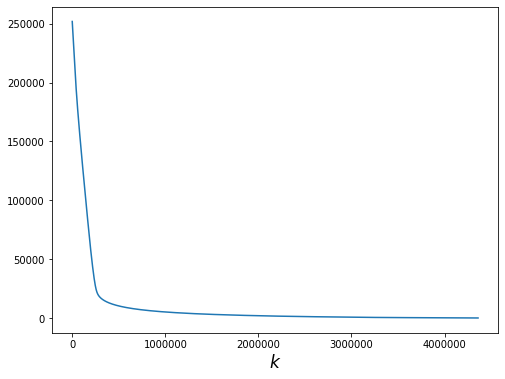

In [65]:
plt.figure(figsize = (8,6))
plt.plot(range(1,len(kbest_error)+1), kbest_error)
plt.xlabel('$k$',size = 17)
plt.savefig('kbesterror_wavelet.png',bbox_inches='tight')
plt.show()

In [62]:
def func(x, C, r):
    return C*x**(-r)
xdata = range(1,len(kbest_error)+1)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, xdata, kbest_error, [kbest_error[0], 1])

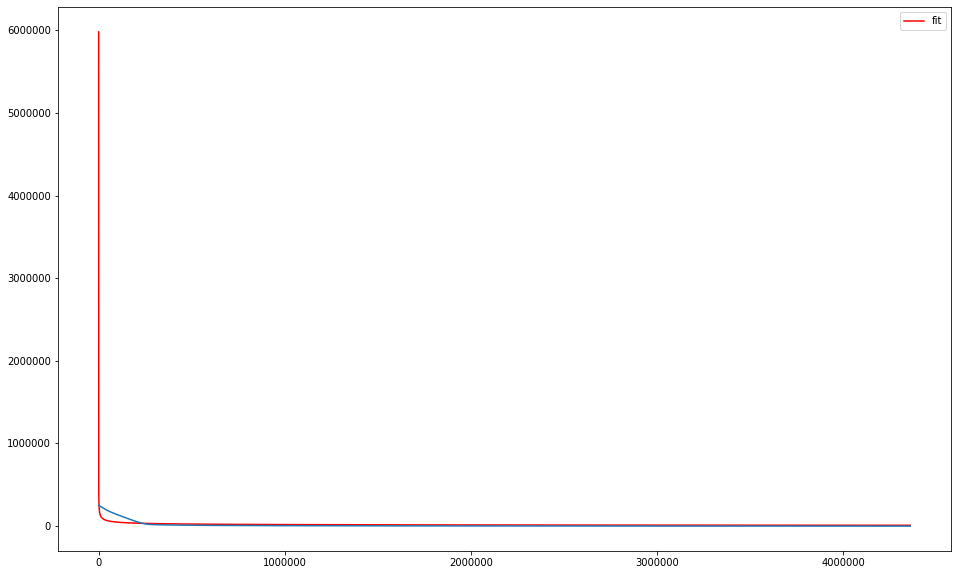

In [63]:
ydata_fit = func(xdata, popt[0], popt[1])
plt.figure(figsize = (16,10))
plt.plot(xdata, ydata_fit, linestyle = '-', color = 'red', label = 'fit')
plt.plot(range(1,len(kbest_error)+1), kbest_error)
plt.legend()

In [64]:
print('C = ', popt[0])
print('r = ', popt[1])

C =  5982608.720635156
r =  0.41932173947938606


In [67]:
sorted_Bflat = np.sort(abs(Bflat))
kbest_error_original = []
for k in range(1, len(Bflat)+1):
    kbest_error_original.append(np.linalg.norm(sorted_Bflat[:-k]))

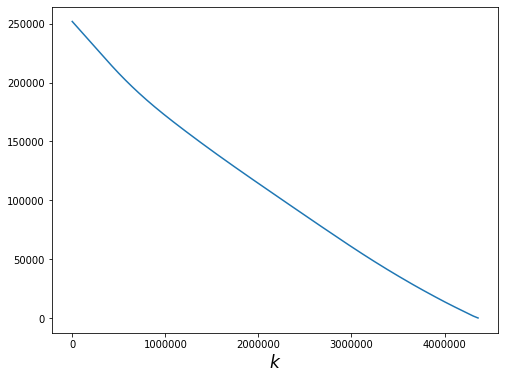

In [68]:
plt.figure(figsize = (8,6))
plt.plot(range(1,len(kbest_error_original)+1), kbest_error_original)
plt.xlabel('$k$',size = 17)
plt.savefig('kbesterror_original.png',bbox_inches='tight')
plt.show()